In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from scipy.optimize import minimize
import sklearn.linear_model as lm


df = pd.read_csv('ds_salaries.csv')
## df = df[df['salary_currency'] == 'USD']
df.head(20)


##unique_values = df['company_location'].nunique()
##print(f"Number of unique values in the column: {unique_values}")

average_salaries = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

print(average_salaries)

average_remote_ratio = df['remote_ratio'].mean()

print("Average Remote Ratio:", average_remote_ratio)

job_title
Data Science Tech Lead           375000.000
Cloud Data Architect             250000.000
Data Lead                        212500.000
Data Analytics Lead              211254.500
Principal Data Scientist         198171.125
                                    ...    
Autonomous Vehicle Technician     26277.500
3D Computer Vision Researcher     21352.250
Staff Data Analyst                15000.000
Product Data Scientist             8000.000
Power BI Developer                 5409.000
Name: salary_in_usd, Length: 93, dtype: float64
Average Remote Ratio: 46.271637816245004


In [ ]:
average_salaries = df.groupby('job_title')['remote_rat'].mean().sort_values(ascending=False)

print(average_salaries)

In [ ]:
unique_values = df['employment_type'].nunique()
print(f"Number of unique values in the column: {unique_values}")

average_salaries = df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False)

print(average_salaries)

Number of unique values in the column: 4
employment_type
FT    138314.199570
CT    113446.900000
FL     51807.800000
PT     39533.705882
Name: salary_in_usd, dtype: float64


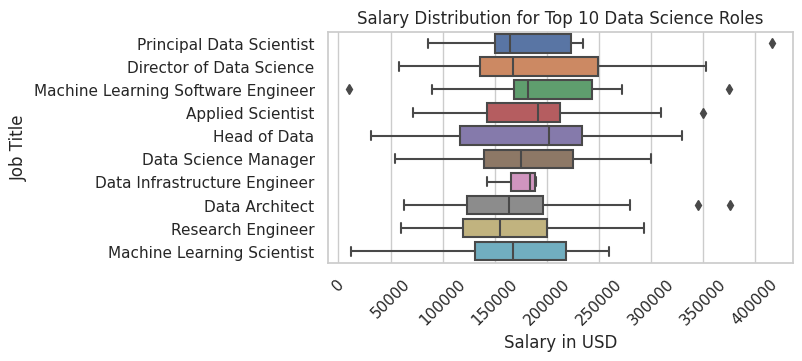

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Loading
ds_salaries_df = pd.read_csv('ds_salaries.csv')  # Replace with your dataset path


# Step 2: Data Preprocessing
# Removing duplicates
ds_salaries_cleaned = ds_salaries_df.drop_duplicates()

# Dropping job_title rows with few values
ds_salaries_cleaned = ds_salaries_cleaned.groupby('job_title').filter(lambda x: len(x) > 5)


# Step 3: Data Analysis
# Identifying top roles by average salary
average_salaries_by_role = ds_salaries_cleaned.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
top_10_roles = average_salaries_by_role.head(10)

# Filtering dataset for the top 10 roles
top_10_roles_df = ds_salaries_cleaned[ds_salaries_cleaned['job_title'].isin(top_10_roles.index)]

# Step 4: Data Visualization
# Setting the style
sns.set(style="whitegrid")

# Creating the plot
plt.figure(figsize=(6, 3))
sns.boxplot(x='salary_in_usd', y='job_title', data=top_10_roles_df, order=top_10_roles.index)
plt.title('Salary Distribution for Top 10 Data Science Roles')
plt.xlabel('Salary in USD')
plt.ylabel('Job Title')
plt.xticks(rotation=45)
plt.show()


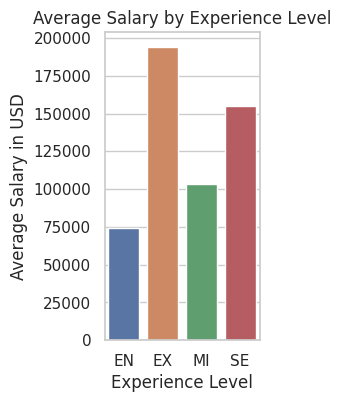

In [ ]:
# Step 2: Exploratory Data Analysis (EDA)
# Analyzing the impact of experience level on salaries
avg_salary_by_experience = ds_salaries_cleaned.groupby('experience_level')['salary_in_usd'].mean()

# Step 4: Data Visualization
sns.set(style="whitegrid")

# Visualizing the impact of experience level on salaries
plt.figure(figsize=(2, 4))
sns.barplot(x=avg_salary_by_experience.index, y=avg_salary_by_experience.values)
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.show()

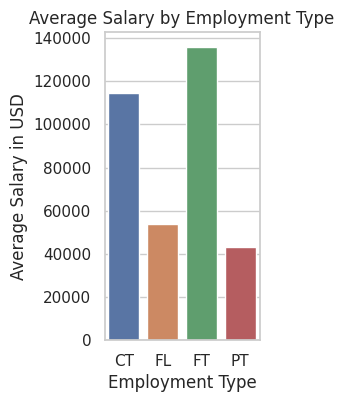

In [ ]:
# Analyzing the impact of employment type on salaries
avg_salary_by_employment_type = ds_salaries_cleaned.groupby('employment_type')['salary_in_usd'].mean()


# Visualizing the impact of employment type on salaries
plt.figure(figsize=(2, 4))
sns.barplot(x=avg_salary_by_employment_type.index, y=avg_salary_by_employment_type.values)
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary in USD')
plt.show()



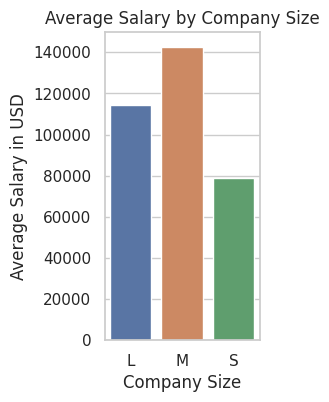

In [ ]:
# Analyzing the impact of company size on salaries
avg_salary_by_company_size = ds_salaries_cleaned.groupby('company_size')['salary_in_usd'].mean()

# Visualizing the impact of company size on salaries
plt.figure(figsize=(2, 4))
sns.barplot(x=avg_salary_by_company_size.index, y=avg_salary_by_company_size.values)
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.show()


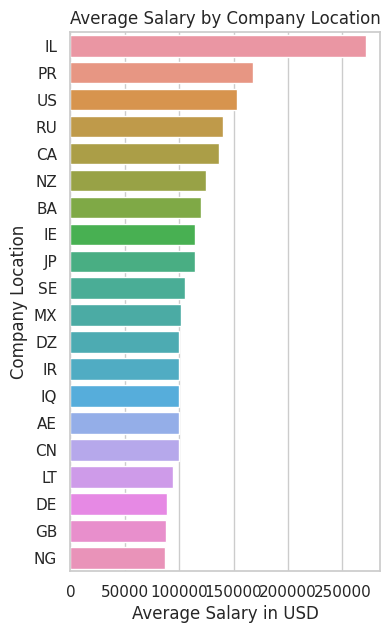

In [ ]:
# Step 3: Advanced Analysis
# Analyzing geographical influences
avg_salary_by_location = ds_salaries_cleaned.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(20)

# Step 4: Data Visualization
sns.set(style="whitegrid")

# Visualizing the geographical distribution of salaries
plt.figure(figsize=(4, 7))
sns.barplot(x=avg_salary_by_location.values, y=avg_salary_by_location.index)
plt.title('Average Salary by Company Location')
plt.xlabel('Average Salary in USD')
plt.ylabel('Company Location')
plt.show()

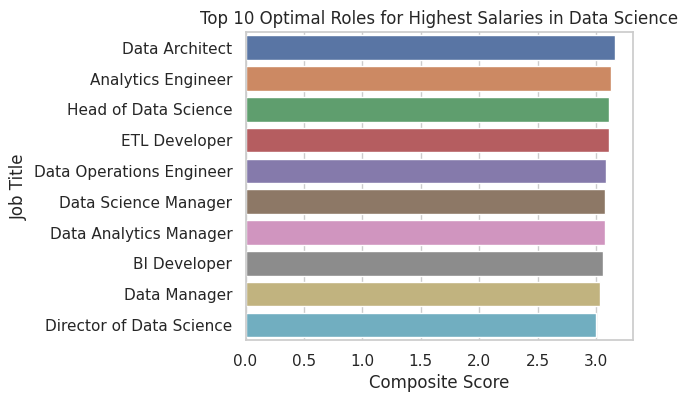

In [ ]:
# creates a composite score for each job title based on the average scores of
# experience level, employment type, company size, and location, and then visualizes the top 10 roles with the highest scores.
# The composite score is a way to encapsulate multiple factors into a single metric
# providing a simplified but insightful view of the most lucrative roles considering various conditions.

avg_salary_by_exp = ds_salaries_cleaned.groupby('experience_level')['salary_in_usd'].mean()
avg_salary_by_employment = ds_salaries_cleaned.groupby('employment_type')['salary_in_usd'].mean()
avg_salary_by_company_size = ds_salaries_cleaned.groupby('company_size')['salary_in_usd'].mean()
avg_salary_by_location = ds_salaries_cleaned.groupby('company_location')['salary_in_usd'].mean()

# Normalize these averages to create scores (0-1 scale for simplicity)
score_exp = (avg_salary_by_exp - avg_salary_by_exp.min()) / (avg_salary_by_exp.max() - avg_salary_by_exp.min())
score_employment = (avg_salary_by_employment - avg_salary_by_employment.min()) / (avg_salary_by_employment.max() - avg_salary_by_employment.min())
score_company_size = (avg_salary_by_company_size - avg_salary_by_company_size.min()) / (avg_salary_by_company_size.max() - avg_salary_by_company_size.min())
score_location = (avg_salary_by_location - avg_salary_by_location.min()) / (avg_salary_by_location.max() - avg_salary_by_location.min())

# Create a copy of the DataFrame to avoid setting values on a slice
ds_salaries_processed = ds_salaries_cleaned.copy()

# Assign scores to each row in the new DataFrame
ds_salaries_processed['score'] = (ds_salaries_processed['experience_level'].map(score_exp) +
                                  ds_salaries_processed['employment_type'].map(score_employment) +
                                  ds_salaries_processed['company_size'].map(score_company_size) +
                                  ds_salaries_processed['company_location'].map(score_location))

# Group by job title and calculate average composite score
avg_score_by_role = ds_salaries_processed.groupby('job_title')['score'].mean().sort_values(ascending=False)

# Selecting top 10 roles
top_10_roles = avg_score_by_role.head(10)

# Visualization
plt.figure(figsize=(5, 4))
sns.barplot(x=top_10_roles.values, y=top_10_roles.index)
plt.title('Top 10 Optimal Roles for Highest Salaries in Data Science')
plt.xlabel('Composite Score')
plt.ylabel('Job Title')
plt.show()

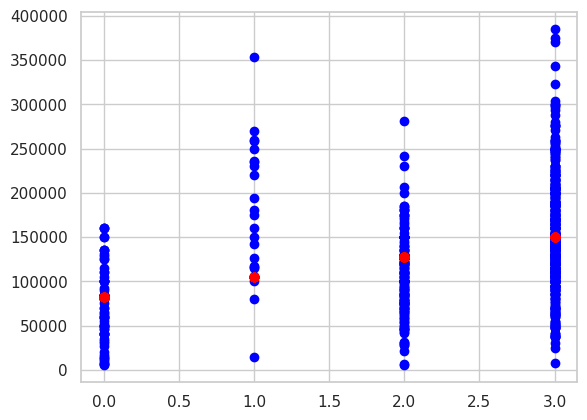

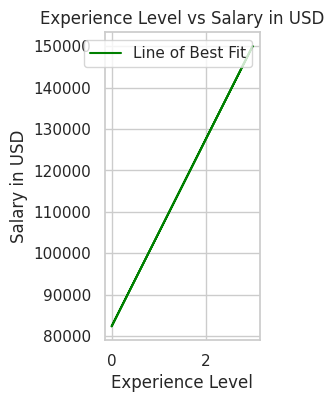

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('ds_salaries.csv')

# For simplicity, let's convert categorical variables to numeric
# using Label Encoding
label_encoders = {}
for column in ['experience_level']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Selecting features and target variable
X = df[['experience_level']]
y = df['salary_in_usd']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

plt.scatter(X_test['experience_level'], y_test, color='blue', label='Actual Data')

# Predict values using only 'experience_level'
predicted = model.predict(X_test[['experience_level']])

# Plot predicted data
plt.scatter(X_test['experience_level'], predicted, color='red', label='Predicted Data')

# Plotting the line of best fit
plt.plot(X_test['experience_level'], predicted, color='green', label='Line of Best Fit')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Experience Level vs Salary in USD')
plt.legend()
plt.show()

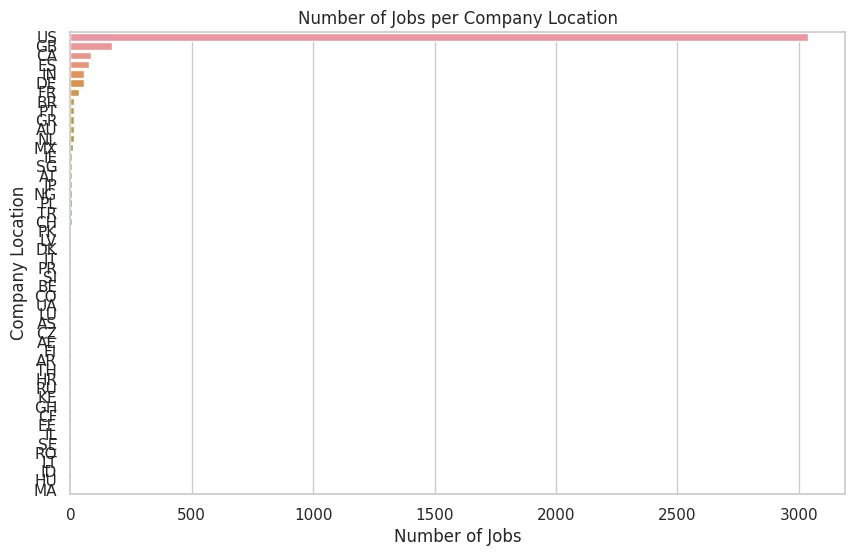

In [ ]:
ds_salaries_df = pd.read_csv('ds_salaries.csv')  # Replace with your dataset path

# Counting the number of jobs per company location
jobs_per_location = ds_salaries_df['company_location'].value_counts().sort_values(ascending=False).head(50)

# Data Visualization
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=jobs_per_location.values, y=jobs_per_location.index)
plt.title('Number of Jobs per Company Location')
plt.xlabel('Number of Jobs')
plt.ylabel('Company Location')
plt.show()